# Project overview

## FINACIAL INCLUSIVITY CHECKER

This is the notebook that will house the dataset to be prepared and later analysed in accordance to the project goals.

###DATASET
The group Brainy Badgers, has been tasked with assessing the level of financial inclusion in the region encompassing Kenya, Rwanda , Uganda and Tanzania. This is being done with the help of a dataset called the Financial Inclusion dataset.It is an excel format datatable that has thirteen columns and twenty three thousand five hundred and twenty five rows.The attributes are as follows:

-country -(Country interviewee is in.)

-year -(Year survey was done in.)

-unique id - (Unique identifier for each interviewee)

-location type -(Type of location: Rural, Urban)

-cellphone access -(If interviewee has access to a cellphone: Yes, No)

-household size -(Number of people living in one house)

-Age of respondent -(The age of the interviewee)

-gender of respondent - (Gender of interviewee: Male, Female)

-relationship with head - (The interviewees' relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know)

-maritial status - (The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know)

-education level - (Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA)

-job type - (Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer)

Prior to the analysis of the dataset, cleaning will be undertaken. Primarily this will involve the removal of duplicates ,removal of the uniqueid column and the changing of the datatypes respectively.

The next step will be the creation of new columns from the breaking of existing columns. From the relationship with head column,we will create a new column called head_of_household,this will state yes if the respondent is the head of the household.

The next column to be broken will be the maritial status column creating a new column called the living_condition which will identify the state of the respondent whether they live with their spouse or not.

To then ensure the validity of the data we will then identify duplications in the dataset ,removing all duplicates from the data.We will also be converting the year column to datetime datatypes.

After this, the data will be cleaned to sufficently.



# 1.0 Import the libraries

In [ ]:
#First we will import all important libraries : Panda and Numpy.
#
import pandas as pd #For optimum manipulation of large datasets. 
import numpy as np #For manipulation of numeric array values.

# 2.0 Upload the the datasets.

In [ ]:
# Upload the Dataset
df = pd.read_csv('/content/Train.csv')

In [ ]:
# Upload the Dataset definitions
Variable_df = pd.read_csv('/content/VariableDefinitions.csv')

# 3.0 Preview the data

In [ ]:
# Preview the Train.csv Dataset.
df.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Preview the Variable Definitions csv.
# pd.read_('/content/VariableDefinitions.csv')
Variable_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# 4.0 Accessing Information about our Dataset

In [ ]:
# Getting to know more about the dataset by accessing its information

print(df.columns)#To identify column names.
print(df.shape)#To identify dataframe dimensions.
print(df.isnull().sum())#To list the number of null values per column.

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')
(23524, 12)
country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


# 5.0 Data Cleaning





## Checking if column names match with variable definitions csv

In [ ]:
Variable_df['Variable Definitions']

0                    country
1                       year
2                   uniqueid
3              location_type
4           cellphone_access
5             household_size
6          age_of_respondent
7       gender_of_respondent
8     relationship_with_head
9             marital_status
10           education_level
11                  job_type
Name: Variable Definitions, dtype: object

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

## 5.01 Splitting columns

In [ ]:

# Splitting the column 'marital_status' into
# marital status and living conditions.
#This was because the column contained more than one categorical values and caused clustering.
df[['marital_status','living_condition']] = df['marital_status'].str.split('/',expand=True)


In [ ]:
#Checking changes
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,None
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married


## 5.02 Create a Head of household column

In [ ]:
#Create a new column 'head_of_household'
#This column would identify whether the respondent was the head of the household or not.  
#Make'head_of_household' with True='Yes' and False='No'
df['head_of_household'] = df.loc[:, 'relationship_with_head']
df['head_of_household'].replace('Head of Household','Yes', inplace=True)
df['head_of_household'].replace(to_replace=('Spouse','Other relative','Child','Parent' ,'Other non-relatives', 'Dont Know' ,'Spouse' ) , value='No' , inplace =True)
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition,head_of_household
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together,No
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,None,Yes
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married,No
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together,Yes
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Seperated,Yes
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Never Married,Yes
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,None,No
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Seperated,No


## 5.03 Check for duplicates

In [ ]:
#checking for duplicates
df.duplicated().sum()

0

## 5.04 Check for null values

In [ ]:
#Checking for null values ,after creating new columns.
df.isnull().sum()

country                      0
year                         0
uniqueid                     0
bank_account                 0
location_type                0
cellphone_access             0
household_size               0
age_of_respondent            0
gender_of_respondent         0
relationship_with_head       0
marital_status               0
education_level              0
job_type                     0
living_condition          2716
head_of_household            0
dtype: int64

## 5.06 Replace null values


In [ ]:
# To replace null values in living status with the values respective to maritial status column values that were 
#Either 'Widowed' or 'Dont Know', the null values were replaced with these.

df.living_condition.fillna(df.marital_status,inplace=True) 


In [ ]:
# To check if null values are replaced
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
living_condition          0
head_of_household         0
dtype: int64

## 5.07 Drop the Unique id. 

In [ ]:
#Dropping the Unique id column 
df.drop('uniqueid', axis=1,inplace=True)
df.head(10)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition,head_of_household
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together,No
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed,Yes
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married,No
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together,Yes
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married,No
5,Kenya,2018,No,Rural,No,7,26,Female,Spouse,Married,Primary education,Informally employed,Living together,No
6,Kenya,2018,No,Rural,Yes,7,32,Female,Spouse,Married,Primary education,Self employed,Living together,No
7,Kenya,2018,No,Rural,Yes,1,42,Female,Head of Household,Married,Tertiary education,Formally employed Government,Living together,Yes
8,Kenya,2018,Yes,Rural,Yes,3,54,Male,Head of Household,Married,Secondary education,Farming and Fishing,Living together,Yes
9,Kenya,2018,No,Urban,Yes,3,76,Female,Head of Household,Divorced,No formal education,Remittance Dependent,Seperated,Yes


## 5.08 Checking and aligning column datatypes

In [ ]:
#Checking column datatypes
df.dtypes

country                   object
year                       int64
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
living_condition          object
head_of_household         object
dtype: object

In [ ]:
#Converting the Yes/No value columns into string datatypes
#As well as converting the year column to datetime datatype
#
convert_dict = {'bank_account': str,'cellphone_access': str ,'head_of_household': str}
df = df.astype(convert_dict)
df['year']=pd.to_datetime(df['year'])
df.dtypes

country                           object
year                      datetime64[ns]
bank_account                      object
location_type                     object
cellphone_access                  object
household_size                     int64
age_of_respondent                  int64
gender_of_respondent              object
relationship_with_head            object
marital_status                    object
education_level                   object
job_type                          object
living_condition                  object
head_of_household                 object
dtype: object

In [ ]:
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,living_condition,head_of_household
0,Kenya,1970-01-01 00:00:00.000002018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Living together,No
1,Kenya,1970-01-01 00:00:00.000002018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed,Yes
2,Kenya,1970-01-01 00:00:00.000002018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Never Married,No
3,Kenya,1970-01-01 00:00:00.000002018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Living together,Yes
4,Kenya,1970-01-01 00:00:00.000002018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Never Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,1970-01-01 00:00:00.000002018,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Seperated,Yes
23520,Uganda,1970-01-01 00:00:00.000002018,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Never Married,Yes
23521,Uganda,1970-01-01 00:00:00.000002018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,Widowed,No
23522,Uganda,1970-01-01 00:00:00.000002018,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Seperated,No


In [ ]:
#Exporting the cleaned dataset.
#
df.to_csv('Financial_Inclusivity.csv')



##Business Overview

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account. In the recent past, there has been a significant growth of innovative fintech solutions like MPESA services.How can mobile money transaction services(fintech and mobile banking)  lead to greater financial inclusion for people who don't have access to banks. Greater financial inclusion leads to easier transactions, greater access to credit services, an easier tax base to achieve revenues, better access to savings, insurance 
and fintech services.


###ANALYSIS

After these processes the data will be clean to a satisfactory degree and will now be ready for analysis which will be done both in the pandas method and the sql method.

This will be done using both pandas as well as visualization tools available in the python libraries.This will mean both statistical values and visualizations of target variables will be displayed.

Particular visualization tools will be the seaborn and matplot library visualization.

####Problem Statement:

How mobile money transactions can lead to greater financial inclusion for people who don't have access to banks.Greater financial inclusion leads to greater access to credit services, easier tax base to achieve revenues, better access to savings and fintech services. 

This analysis into the problem statement wii be  the form of solving the following objective questions:


-To determine the number of people who have access to mobile phones and don't have access to the banks

-To determine the percentage of level of access to mobile phones for people in the region.

-To determine the percentage of level of access to mobile phones for people in urban areas and rural areas

-To determine the percentage of level of access to mobile phones for people in the region per country .

-To determine the number of people with access to bank accounts and how this varies in urban and rural areas, variance between the formally employed and the self employed.

-To determine the country with the most mobile phones and the highest number of bank accounts.

-To determine the influence of mobile phone access to and location to job type. 
- To determine the people to be targeted with mobile banking integration.
-To determine the job type to be targeted with fintech marketing in the region for people with a phone but no bank account

-To determine which age has the most access to mobile phones Age with mobile phone but no bank account, highestAge with mobile phone and bank account.


Finally, having answered the objective questions,we will then conclude with an evaluation of the research which was based on the above problem statement. 


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/Financial_Inclusivity.csv')

In [ ]:
df.dtypes


country                           object
year                      datetime64[ns]
bank_account                      object
location_type                     object
cellphone_access                  object
household_size                     int64
age_of_respondent                  int64
gender_of_respondent              object
relationship_with_head            object
marital_status                    object
education_level                   object
job_type                          object
living_condition                  object
head_of_household                 object
dtype: object

In [ ]:
#The first reaserch objective is as follows:
#To determine the number of people who have access to mobile phones and don't have access to the banks
#
A=df.loc[(df['cellphone_access']=='Yes')& (df['bank_account']=='No')]
A.value_counts('country')


country
Rwanda      6265
Tanzania    3362
Kenya       3326
Uganda      1293
dtype: int64

In [ ]:
#The second research question is as follows:
#To determine the percentage of level of access to mobile phones for people in the region per country.
#
B=df.loc[(df['cellphone_access']=='Yes')] 
B.value_counts('country', normalize=True)



country
Rwanda      0.415320
Kenya       0.274149
Tanzania    0.226653
Uganda      0.083878
dtype: float64

In [ ]:
#The third research question is as follows:
#To determine the percentage of level of access to mobile phones for people in urban areas and rural areas
#
RU=df.loc[(df['cellphone_access']=='Yes')] 
RU.value_counts('location_type', normalize=True)

location_type
Rural    0.634239
Urban    0.365761
dtype: float64

In [ ]:
#The fourth research question is as follows:
#To determine access to mobile phones for people in the region per country .
#
D=df.loc[(df['cellphone_access']=='Yes')] 
D.value_counts('country')


country
Rwanda      7249
Kenya       4785
Tanzania    3956
Uganda      1464
dtype: int64

In [ ]:
#The fifth research question is as follows:
#To determine which age has the most access to mobile phones.
#
age=df.loc[(df['cellphone_access']=='Yes')]
ag=age.value_counts('age_of_respondent')
ag.head(1)

age_of_respondent
30    824
dtype: int64

[Text(0.5, 1.0, 'Ages to Cellphone access')]

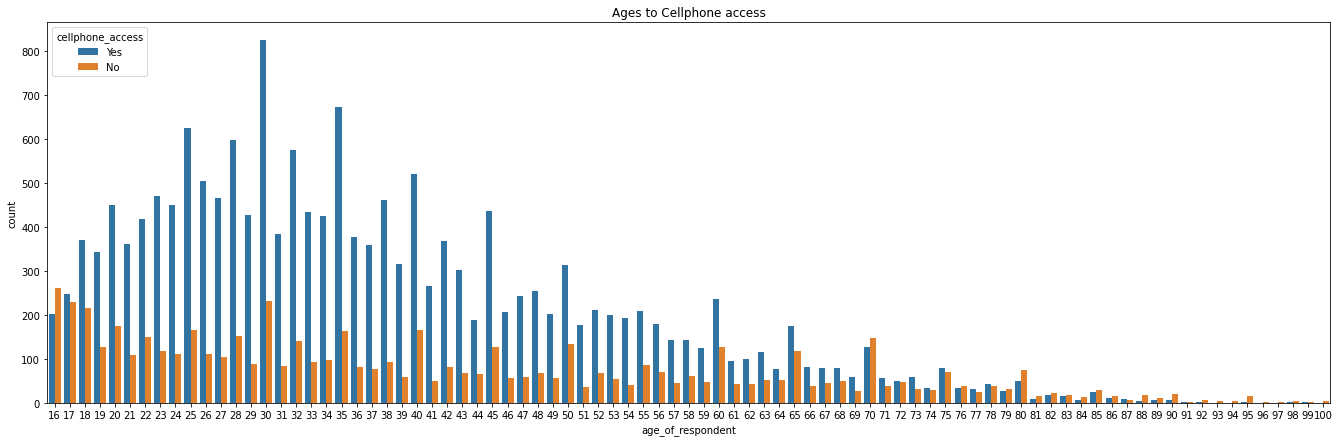

In [ ]:
#The fifth question visualized will present the distribution of the results.
#And assist in the identification of correlations between mobile access and ages of the respondents.
#We will use the user friendly Seaborn and matplotlib libraries to do this.
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(23,7))
sns.countplot(x='age_of_respondent', data=df ,hue='cellphone_access' ).set(title='Ages to Cellphone access')




The trend was identified as follows; a sharp increase between the 16 years to 30 years, the steady and slightly steep decline to the 90 years before reaching near zero.It was also noted that the number of lack of cell phone accesses was highest at 16 years and gradually declined with occasional spikes in count till reaching near zero at 100 years.It is also evident that these numbers wa higher than cell phone access counts after 90 years.

In [ ]:
#The sixth research question is as follows:
#-To determine the country with the most mobile phones.
#
phone=df.loc[(df['cellphone_access']=='Yes')]
c=phone.value_counts('country')
c.head(1)

#This was identified to be Rwanda.

country
Rwanda    7249
dtype: int64

In [ ]:
#The seventh research question is as follows:
#Determining the country with the most bank accounts.
#
bank=df.loc[(df['bank_account']=='Yes')]
b=bank.value_counts('country')
b.head(1)
#This was identified as Kenya.

country
Kenya    1521
dtype: int64

In [ ]:
#We will now carry out visualizaion for the dataset above.
#We will use the seaborn library and matplotlib library for the visualization.
#
import seaborn as sns
from matplotlib import pyplot as plt


[Text(0.5, 1.0, 'Country to Bank access')]

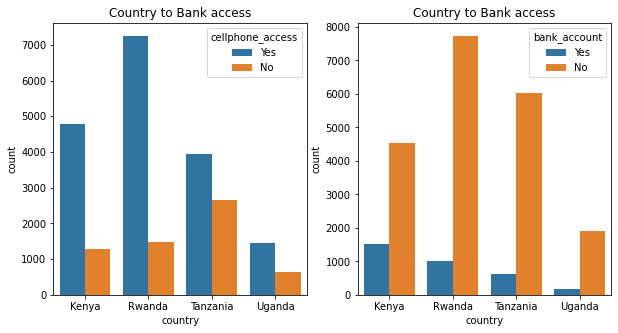

In [ ]:
#The first visualization will regard.
#Determination of trends between the number of people who have access to mobile phones and don't have access to the banks per country
#
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='country', data=df ,hue='cellphone_access' ).set(title='Country to Bank access')
plt.subplot(1,2,2)
sns.countplot(x='country', data=df ,hue='bank_account' ).set(title='Country to Bank access')

The primary trend is that the countries cellphone access counts seems to relate the lack of bank account accesses.This being because the count levels for cellphone accesses being nearly the same if not less than the count levels for persons lacking bank accounts.

[Text(0.5, 1.0, 'Population count to Location type')]

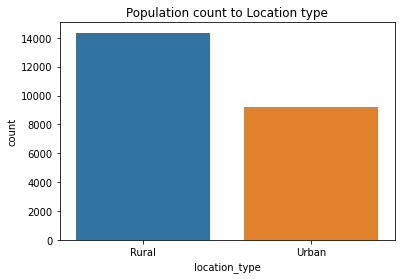

In [ ]:
#The second visualization will regard.
#Determination of the number of people in rural and urban areas. 
#
sns.countplot(x='location_type', data=df ).set(title='Population count to Location type')

From here it is clear that the survey contained respondents largely from rural areas than urban areas. Here it might be safe to speculate that if these numbers were equal the results to follow may have been differnt.

[Text(0.5, 1.0, 'Population count to Job types')]

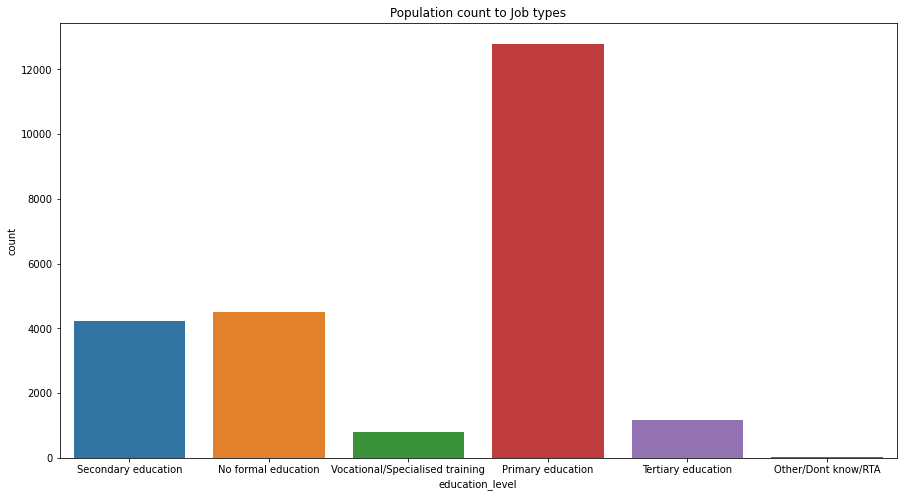

In [ ]:
#The third visualization will regard.
#Determination of the trends between education type within the datasets. 
#
plt.figure(figsize=(15,8))
sns.countplot(x='education_level', data=df ).set(title='Population count to Education level')

Here we can see that the majority of respondents from the survey had primary education level.

[Text(0.5, 1.0, 'Education level to Job types')]

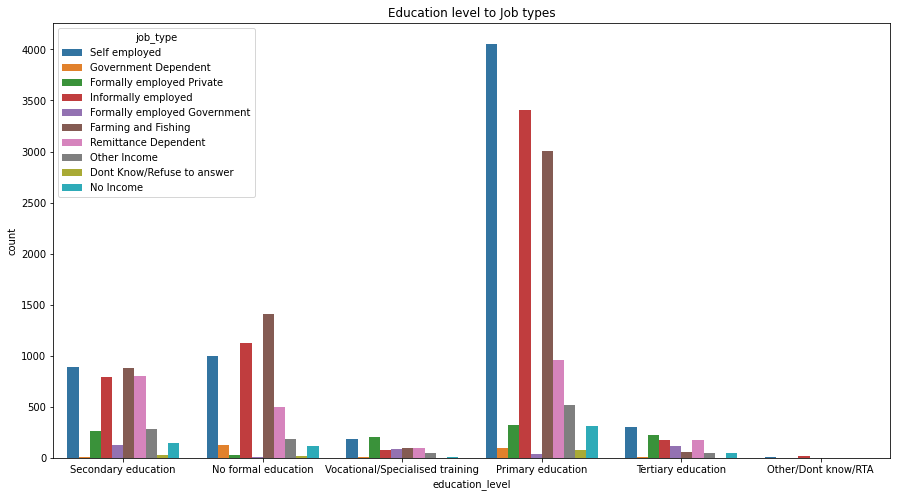

In [ ]:
#The fourth visualization will regard.
#Determination of the influence between education level  to job type counts.
#
plt.figure(figsize=(15,8))
sns.countplot(x='education_level', data=df ,hue='job_type' ).set(title='Education level to Job types')

There is an interesting trend here, as the majority of the job  tpye counts are concenterated among those who have reached primary education.Another point to note that lowest job type counts are concentrated among the specialised trainning and teriary education level persons.

[Text(0.5, 1.0, 'Bank access to Maritial status')]

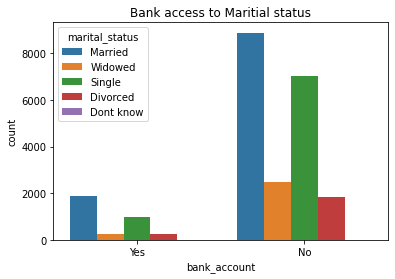

In [ ]:
#The fifth visualization will regard.
#Determination of the influence between bank account access to marital status.
#
sns.countplot(x='bank_account', data=df ,hue='marital_status' ).set(title='Bank access to Maritial status')

From this we can see the relation between bank accounts and maritial statuses.The largest concentration of maritial statuse donot have access to bank accounts.The targets for focus in fitech campaigns should be for married and singlepersons as they carry greater weight in the group lacking bank access.

[Text(0.5, 1.0, 'Country to Cellphone access')]

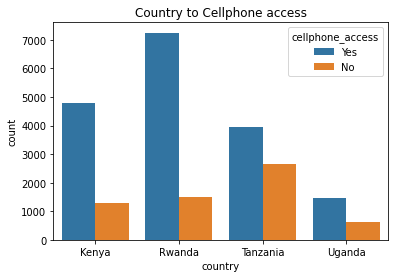

In [ ]:
#The sixth visualization will regard.
#Determination of the number of people who have access to mobile phones per country .
#
sns.countplot(x='country', data=df ,hue='cellphone_access' ).set(title='Country to Cellphone access')

[Text(0.5, 1.0, 'Country to Education level')]

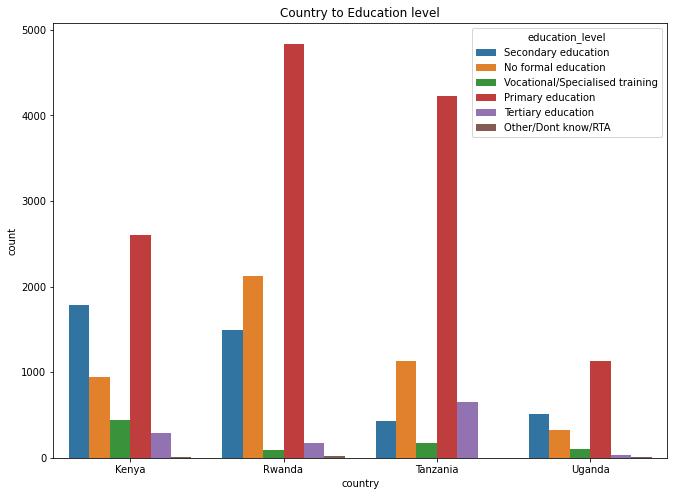

In [ ]:
#The seventh visualization will regard.
#Determinating the distribution of education levels and countries.
#
plt.figure(figsize=(11,8))
sns.countplot(x='country', data=df ,hue='education_level' ).set(title='Country to Education level')

Here the largest distribution of education counts is in Rwanda, what this means is that the majority counts of education levels per country in the survey were from Rwanda.It is also noted that the largest count of persons as per education were of primary level.This being that most people in the survery had achieved at most primary level education.

[Text(0.5, 1.0, 'Location type to Cellphone access')]

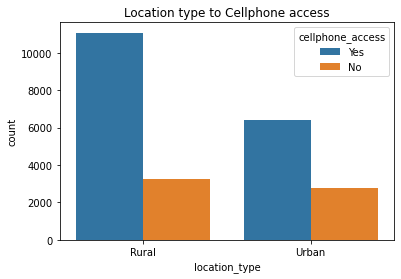

In [ ]:
#The eigth visualization will regard.
#Determination of the level of access to mobile phones for people in urban areas and rural areas.
#
sns.countplot(x='location_type', data=df ,hue='cellphone_access' ).set(title='Location type to Cellphone access')

From this an interesting trend is noted, this involves the rural areas having greater number of cellphone accesses than urban areas.It is also noted that the numbers of persons lacking cellphone access is nearly the same in both locationtypes.

[Text(0.5, 1.0, 'Cellphone access to Job type')]

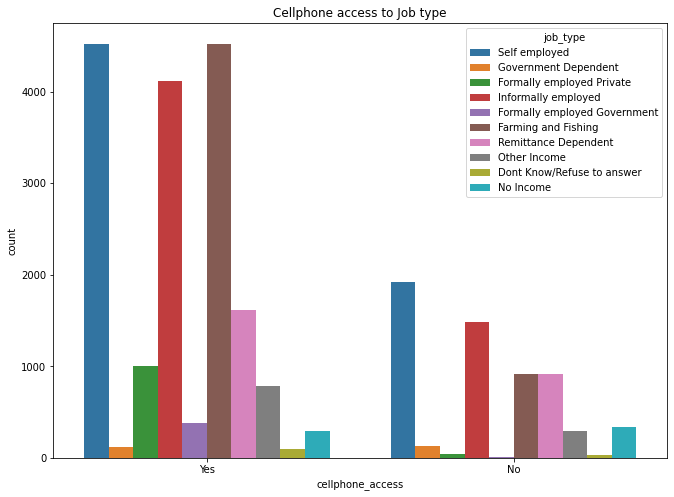

In [ ]:
#The ninth visualization will regard.
#Determination of the influence of mobile phone access to employment status..
#
plt.figure(figsize=(11,8))
sns.countplot(x='cellphone_access', data=df ,hue='job_type' ).set(title='Cellphone access to Job type')

Here it was identified that the larger concentration of higher job types count was among those with cellphones, while there were substantially fewer job type counts for those without cellphone access.From this it is clear that their is a large market of income earners without cellphones and they would be best for fintech cellphone marketing campaigns.


[Text(0.5, 1.0, 'Bank access to Job type')]

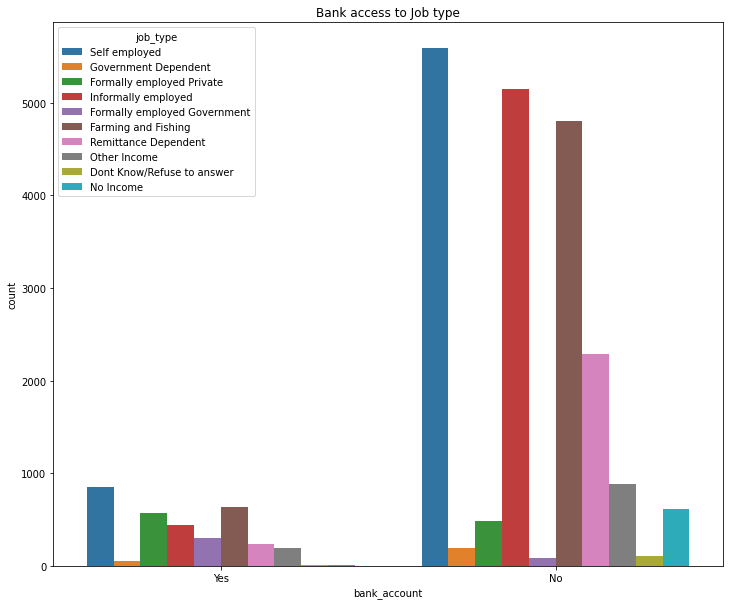

In [ ]:
#The tenth visualization will regard:
#Identification of the employment type and bank account access, this will determine the areas of interest for analysis. 
#
plt.figure(figsize=(12,10))
sns.countplot(x='bank_account', data=df ,hue='job_type' ).set(title='Bank access to Job type')

From the above, it has been noted that the largest portion of job types counts belonged to persons without any available bank accounts . This means that there is a large market for persons without bank accounts with income sources who can be targeted for fintech services.



[Text(0.5, 1.0, 'Country to Respondent status')]

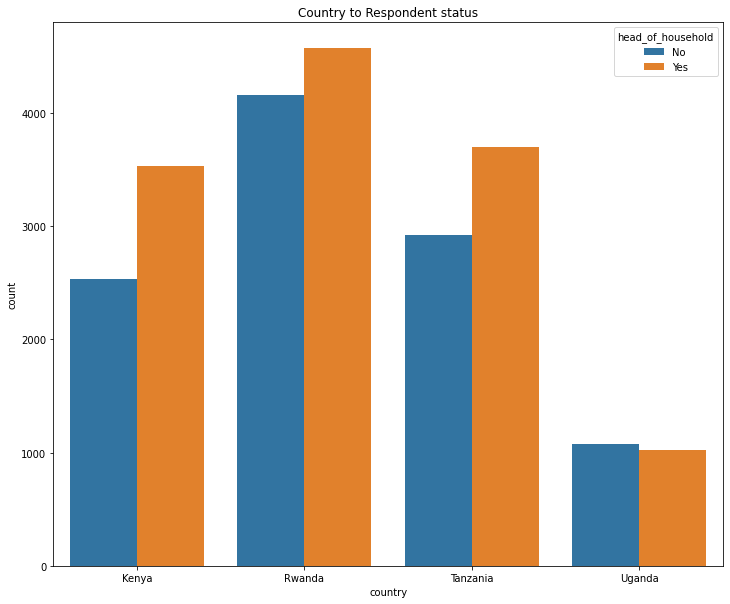

In [ ]:
#The eleventh visualization will regard:
#Identification of the country influence on the head of households. 
#
plt.figure(figsize=(12,10))
sns.countplot(x='country', data=df ,hue='head_of_household' ).set(title='Country to Respondent status')

There seems to be trend where the number of non head of household members being greater than head of household members in each country except for Uganda.

[Text(0.5, 1.0, 'Location type to Job type')]

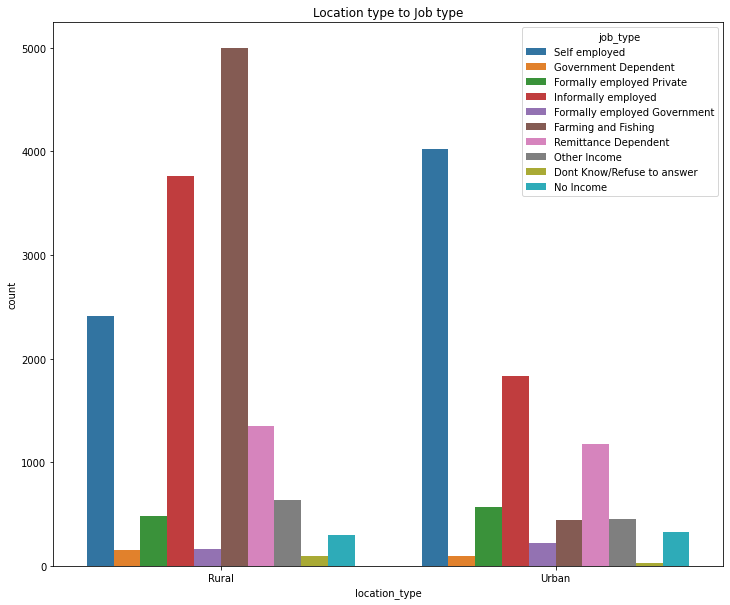

In [ ]:
#The twelvth visualization will regard:
#Identification of the employment type and location type, this will determine the areas of interest for analysis. 
#
plt.figure(figsize=(12,10))
sns.countplot(x='location_type', data=df ,hue='job_type' ).set(title='Location type to Job type')

Here it was identified that the larger concentration of higher job types count was among those with in rural area, while there were substantially less job type counts for those in urban  areas.This means that it would be best to renew efforts targeting rural areas.

[Text(0.5, 1.0, 'Household sizes to Cellphone access')]

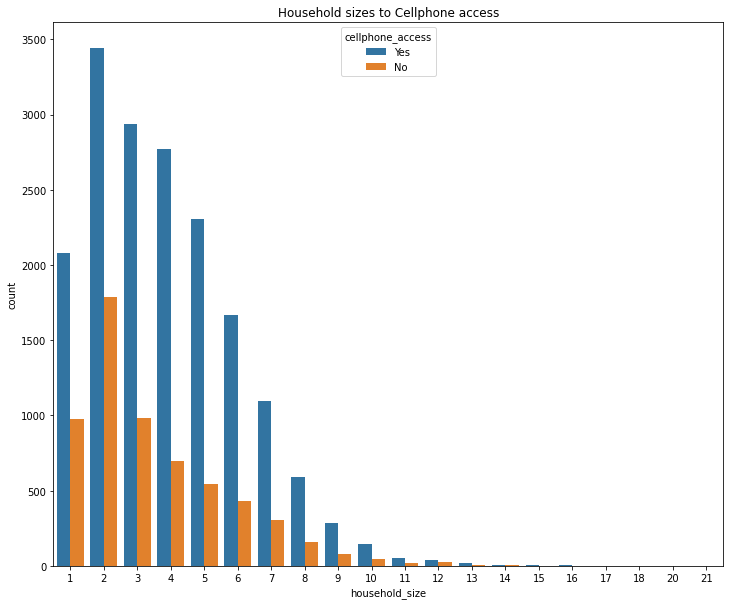

In [ ]:
#The last visualization will involve:
#Determination of cellphone counts and influence on the household sizes
#
plt.figure(figsize=(12,10))
sns.countplot(x='household_size', data=df ,hue='cellphone_access' ).set(title='Household sizes to Cellphone access')


Here we can identify that the household size with the highest lack of cellphone access is two. This means that compaigns like 'two for one' should be employed to capitalize on this group. 